## Numerical Simulation Laboratory (NSL)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erf

### Exercise 1

The aim of this exercise is to compute the price of a *Plain vanilla call-option* and a *put-option* using a Monte Carlo tecnique.
The parameters of the simulation are:
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$

Market parameters used:
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

The price has to be calculeted first with a direct sampling of the final asset price $S(T)$ and than with a discretized *geometric brownian motion* simulation of the path of the asset price.
In both cases I compared the obtained results with the analitic solution of the problem provided by Black and Scholes method.

I produced the pictures of the estimations of the prices and their uncertainties using $M= 10^5$ asset prices, divided in $100$ blocks, as a function of the number of blocks.

In [2]:
# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / np.sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * np.sqrt(T)) * (np.log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * np.sqrt(T)
    C = S0 * N(d1) - K * np.exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * np.exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


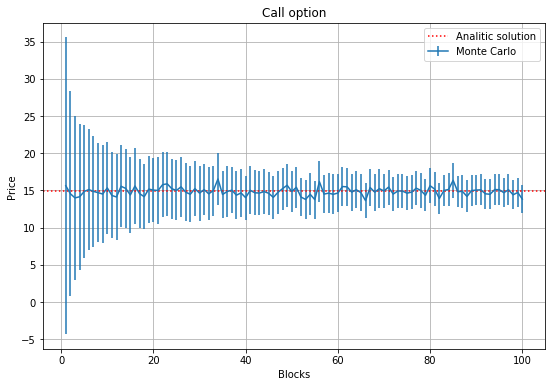

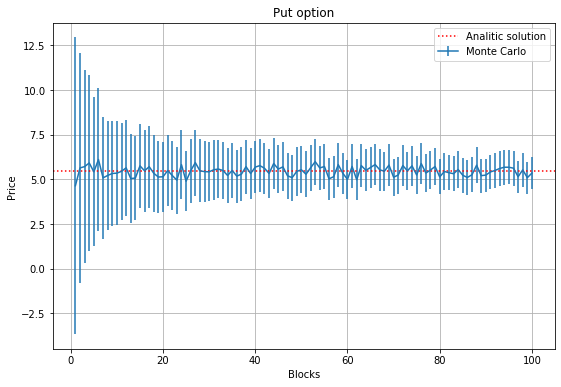

In [3]:
plt.figure(1, figsize = (9, 6))
x_call, y_call, yerr_call = np.loadtxt("Exercise_01/output_call.dat", delimiter = " ", unpack = True)
plt.title("Call option")
plt.xlabel('Blocks')
plt.ylabel('Price')
plt.axhline(y=14.975790778311286, color='r', linestyle="dotted", label = "Analitic solution")
plt.errorbar(x_call, y_call, yerr_call, label = "Monte Carlo")
plt.grid(True)
plt.legend()

plt.figure(2, figsize = (9, 6))
x_put, y_put, yerr_put = np.loadtxt("Exercise_01/output_put.dat", delimiter = " ", unpack = True)
plt.title("Put option")
plt.xlabel('Blocks')
plt.ylabel('Price')
plt.axhline(y=5.4595325819072364, color='r', linestyle="dotted", label = "Analitic solution")
plt.errorbar(x_put, y_put, yerr_put, label = "Monte Carlo")
plt.grid(True)
plt.legend()

For the discretized sampling method I divided $[0,T]$ in $100$ time intervals and considered the value of $S$ only at expiry time.
Results are shown below.

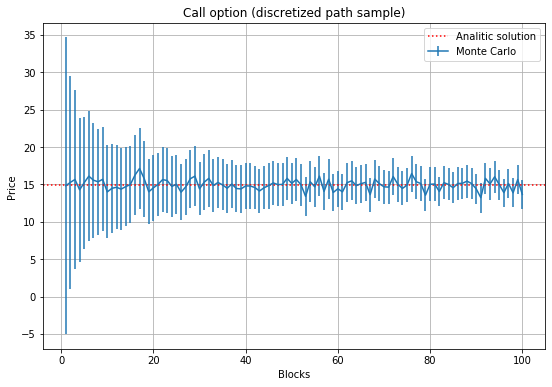

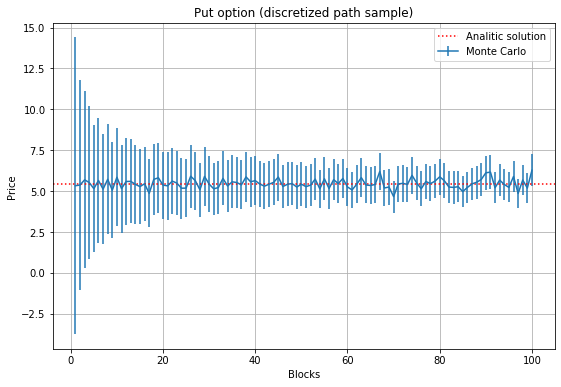

In [4]:
plt.figure(1, figsize = (9, 6))
x_call_disc, y_call_disc, yerr_call_disc = np.loadtxt("Exercise_01/output_call_discretized.dat", delimiter = " ", unpack = True)
plt.title("Call option (discretized path sample)")
plt.xlabel('Blocks')
plt.ylabel('Price')
plt.axhline(y=14.975790778311286, color='r', linestyle="dotted", label = "Analitic solution")
plt.errorbar(x_call_disc, y_call_disc, yerr_call_disc, label = "Monte Carlo")
plt.grid(True)
plt.legend()

plt.figure(2, figsize = (9, 6))
x_put_disc, y_put_disc, yerr_put_disc = np.loadtxt("Exercise_01/output_put_discretized.dat", delimiter = " ", unpack = True)
plt.title("Put option (discretized path sample)")
plt.xlabel('Blocks')
plt.ylabel('Price')
plt.axhline(y=5.4595325819072364, color='r', linestyle="dotted", label = "Analitic solution")
plt.errorbar(x_put_disc, y_put_disc, yerr_put_disc, label = "Monte Carlo")
plt.grid(True)
plt.legend()

The solutions obtained with direct and discretized sampling looks nearly identical and are in a very good agreement whit Black and Scholes analytical result.